<a href="https://colab.research.google.com/github/fluxtransport/webbpsf/blob/develop/load_jwst_psf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  import webbpsf
except:
  #!pip install git+https://github.com/spacetelescope/webbpsf
  #The STScI repo requires python 3.8 but Colab defaults to 3.7. 
  #The following fork lowers the requirement. It's a kluge
  !pip install git+https://github.com/fluxtransport/webbpsf

In [ ]:
import glob
import os
if len(glob.glob('webbpsf-data')) == 0:
  # See https://webbpsf.readthedocs.io/en/latest/installation.html
  !wget https://stsci.box.com/shared/static/34o0keicz2iujyilg4uz617va46ks6u9.gz
  !tar -zxvf 34o0keicz2iujyilg4uz617va46ks6u9.gz
os.environ['WEBBPSF_PATH'] = "webbpsf-data"

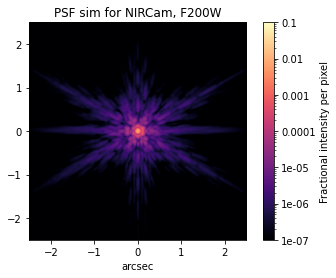

In [ ]:
# Following https://webbpsf.readthedocs.io/en/latest/usage.html
import webbpsf
import matplotlib.pyplot as plt
nc = webbpsf.NIRCam()
nc.filter =  'F200W'
psf = nc.calc_psf(oversample=4)     # returns an astropy.io.fits.HDUlist containing PSF and header
#plt.imshow(psf.data)             # display it on screen yourself, or
webbpsf.display_psf(psf,cmap='magma')            # use this convenient function to make a nice log plot with labeled axes
#psf = nc.calc_psf(filter='F470N', oversample=4)    # this is just a shortcut for setting the filter, then computing a PSF
#nc.calc_psf("myPSF.fits", filter='F480M')